# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkvvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "très"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux de 1966

In [3]:
# Choisir une année
year = 1966

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1966-01-06_01-00009.txt',
 'KB_JB838_1966-01-08_01-00019.txt',
 'KB_JB838_1966-01-11_01-00006.txt',
 'KB_JB838_1966-01-22_01-00010.txt',
 'KB_JB838_1966-01-22_01-00023.txt',
 'KB_JB838_1966-01-25_01-00013.txt',
 'KB_JB838_1966-01-28_01-00018.txt',
 'KB_JB838_1966-01-29_01-00013.txt',
 'KB_JB838_1966-01-29_01-00016.txt',
 'KB_JB838_1966-02-10_01-00001.txt',
 'KB_JB838_1966-02-12_01-00019.txt',
 'KB_JB838_1966-02-13_01-00001.txt',
 'KB_JB838_1966-02-16_01-00006.txt',
 'KB_JB838_1966-02-26_01-00002.txt',
 'KB_JB838_1966-02-27_01-00002.txt',
 'KB_JB838_1966-03-01_01-00020.txt',
 'KB_JB838_1966-03-05_01-00024.txt',
 'KB_JB838_1966-03-16_01-00007.txt',
 'KB_JB838_1966-03-23_01-00014.txt',
 'KB_JB838_1966-03-24_01-00015.txt',
 'KB_JB838_1966-03-25_01-00021.txt',
 'KB_JB838_1966-03-25_01-00026.txt',
 'KB_JB838_1966-03-26_01-00007.txt',
 'KB_JB838_1966-03-26_01-00011.txt',
 'KB_JB838_1966-04-02_01-00005.txt',
 'KB_JB838_1966-04-09_01-00012.txt',
 'KB_JB838_1966-04-10_01-00027.txt',
 

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [16]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"A m ’ vî î‘ l ï ,> * v ,v '■ ’V > i* *. ;■ V, l'uw'1 !ï H.I'ISMWJ-;!-J., WW*'* L.UJJJU JEUDI 6 JANVIER 1966 - - - LE som 9 des Vignette de Ziegler pour les œuvres d'Hoffmann (1840) L À mode est aujour"

In [17]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../tp2/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [18]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"A m ’ vî î‘ l ï ,> * v ,v '■ ’V > i* *. ;■ V, l'uw'1 !ï H.I'ISMWJ-;!-J., WW*'* L.UJJJU JEUDI 6 JANVIER 1966 - - - LE som 9 des Vignette de Ziegler pour les œuvres d'Hoffmann (1840) L À mode est aujourd'hui aux fantômes. Mais les auteurs n’ont pas attendu cette vogue, assez imprévue après les fantasmagories et divagations du romantisme, pour trouver la voie d’un fantastique réel, qui devait conduire de celui d’hier à celui d’aujourd’hui. Ceci est bien démontré par l’excellent et curieux recueil p"

## Nettoyage du fichier

### Créer la fonction de nettoyage

In [19]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [20]:
clean_text(year, folder=temp_path)

'Output has been written in ../tp2/tmp/1966_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'ismwj ujjju jeudi janvier som vignette ziegler œuvres hoffmann mode aujourd hui fantômes auteurs attendu vogue assez imprévue fantasmagories divagations romantisme trouver voie fantastique réel devait conduire celui hier celui aujourd hui ceci démontré excellent curieux recueil publié récemment titre récits fantastiques contes nocturnes titre veut car fantasmes livre natures très diverses présentateur hubert juin dès première ligne préface passe littératures diurne nocturne opposition conduit fu'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('tél', 1676), ('rue', 1361), ('bruxelles', 1204), ('dem', 1143), ('ans', 745), ('prix', 718), ('brux', 655), ('demande', 464), ('ecrire', 456), ('très', 447)]


### Créer, stocker et afficher le nuage de mots

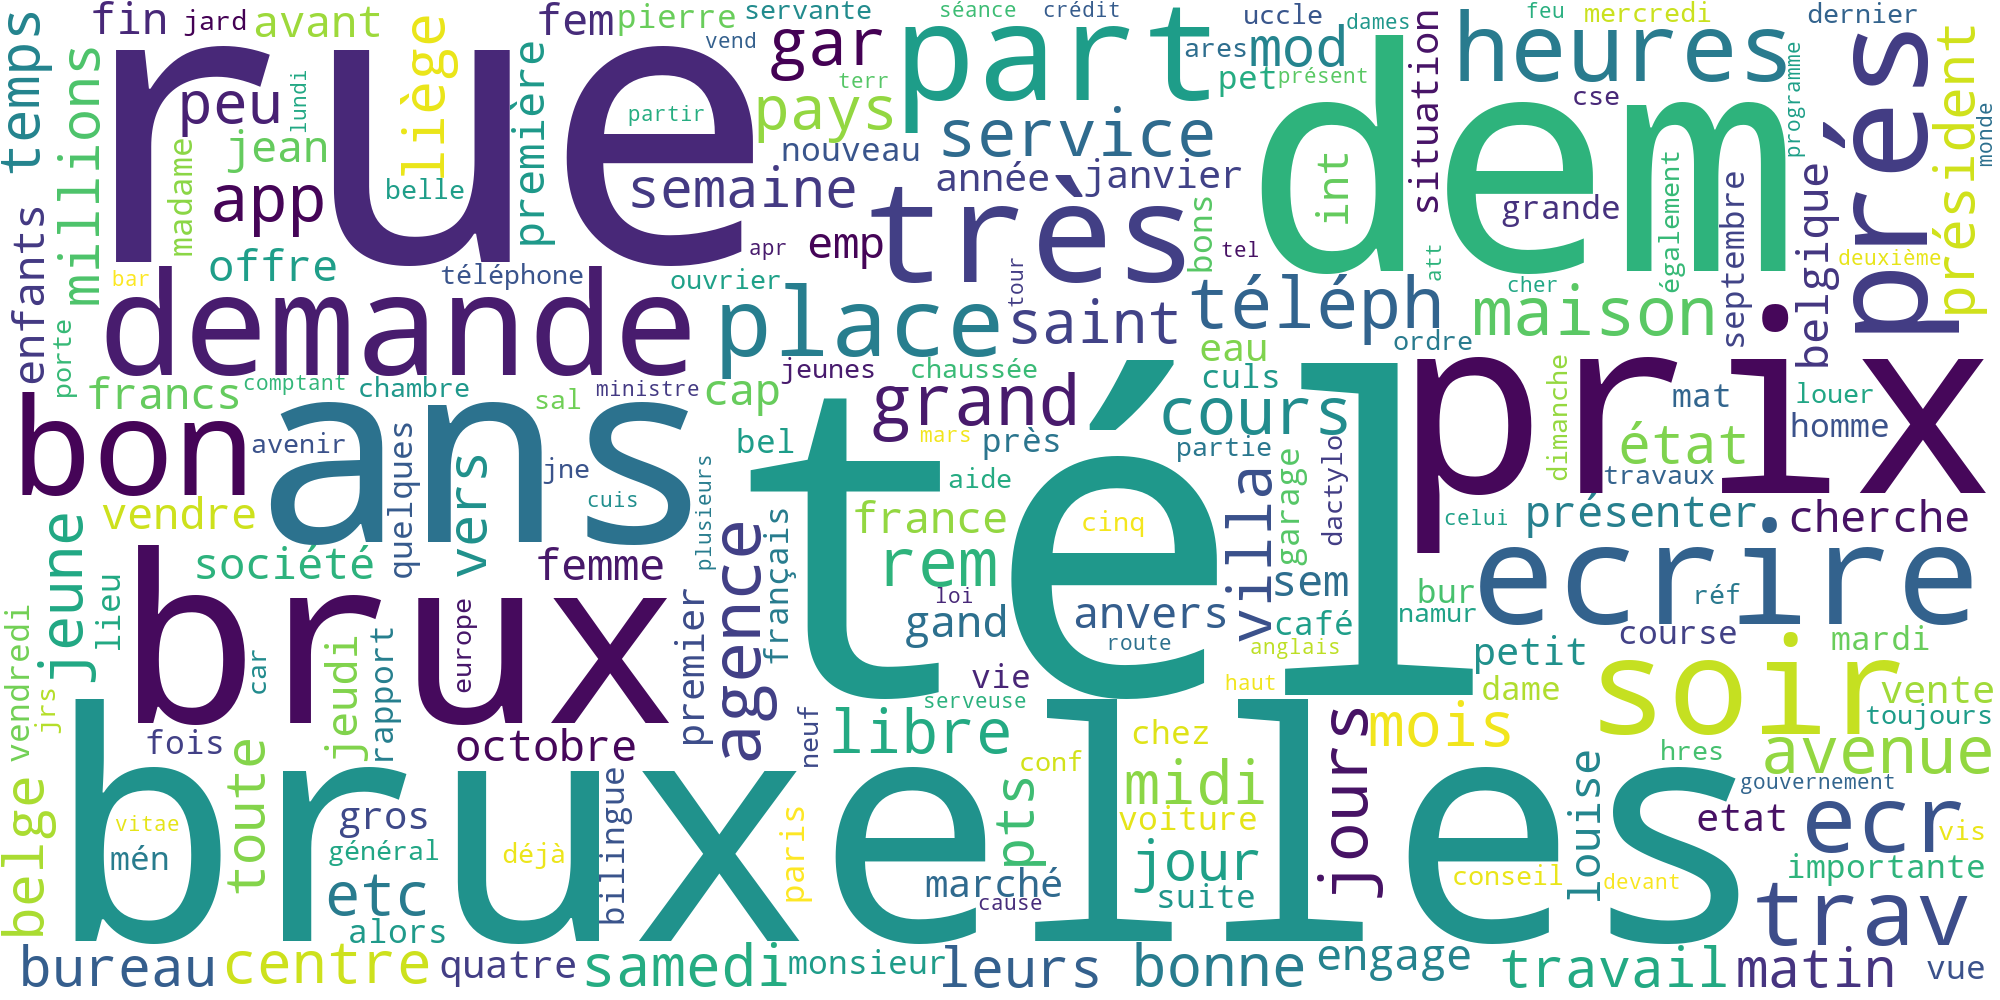

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))